# **ECG Heartbeat Categorization Dataset - Classification**

## About Dataset

**Introduction**

This dataset is composed of two collections of heartbeat signals derived from two famous datasets in heartbeat classification, the [MIT-BIH Arrhythmia Dataset](https://www.physionet.org/content/mitdb/1.0.0/) and the [PTB Diagnostic ECG Database](https://www.physionet.org/content/ptbdb/1.0.0/). The number of samples in both collections is large enough for training a deep neural network.

This dataset has been used in exploring heartbeat classification using deep neural network architectures, and observing some of the capabilities of transfer learning on it. The signals correspond to electrocardiogram (ECG) shapes of heartbeats for the normal case and the cases affected by different arrhythmias and myocardial infarction. These signals are preprocessed and segmented, with each segment corresponding to a heartbeat.

**Content:**

<font color =orange>**The MIT-BIH Arrhythmia Dataset**</font>
- Number of Samples: 109446
   
- Number of Categories: 5

- Sampling Frequency: 125Hz

- Data Source: Physionet's MIT-BIH Arrhythmia Dataset

- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

  - N: Normal beat
  - S: Supraventricular premature beat
  - V: Premature ventricular contraction
  - F: Fusion of ventricular and normal beat
  - Q: Unclassifiable beat


<font color =orange>**The PTB Diagnostic ECG Database**</font>
- Number of Samples: 14552

- Number of Categories: 2

- Sampling Frequency: 125Hz

- Data Source: Physionet's PTB Diagnostic Database


<font color = red>**Remark:**</font> *All the samples are cropped, downsampled and padded with zeroes if necessary to the fixed dimension of 188.*

**Data Files**

This dataset consists of a series of CSV files. Each of these CSV files contain a matrix, with each row representing an example in that portion of the dataset. The final element of each row denotes the class to which that example belongs.

**Acknowledgements**

Mohammad Kachuee, Shayan Fazeli, and Majid Sarrafzadeh. "ECG Heartbeat Classification: A Deep Transferable Representation." [arXiv preprint arXiv:1805.00794 (2018).](https://arxiv.org/abs/1805.00794)

**Provider:** Shayan Fazeli

**Reference:** https://www.kaggle.com/datasets/shayanfazeli/heartbeat/data

## About this notebook

For this notebook, we refer the source code shared by Gregoire DC on Kaggle as a reference.
(https://www.kaggle.com/code/gregoiredc/arrhythmia-on-ecg-classification-using-cnn/notebook)

## Setup

In [1]:
import pandas as pd
import numpy as np

# Figure
import matplotlib.pyplot as plt
import ipywidgets as widgets
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score
from keras.utils import to_categorical
from sklearn.utils import class_weight
#from sklearn.preprocessing import StandardScaler
#from sklearn.linear_model import LogisticRegression
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
#from sklearn.svm import SVC
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
#from sklearn.ensemble import VotingClassifier, StackingClassifier
#from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

## Version

- python: 3.9.25
  
- pandas: 2.3.3
  
- numpy: 1.26.0
  
- tensorflow: 2.19.1

- keras: 3.6.0


## Importing the MIT-BIH Arrhythmia Dataset

In [2]:
filepath_train = "C:/Users/User/My Porject (Jupyter notebook)/Database/ECG Heartbeat Categorization Dataset/mitbih_train.csv"
filepath_test = "C:/Users/User/My Porject (Jupyter notebook)/Database/ECG Heartbeat Categorization Dataset/mitbih_test.csv"

df_train = pd.read_csv(filepath_train, header=0)
df_test = pd.read_csv(filepath_test, header=0)

In [3]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the training dataframe") 
df_train.head(5)

The first 5 rows of the training dataframe


,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print("The first 5 rows of the test dataframe") 
df_test.head(5)

The first 5 rows of the test dataframe


,1.000000000000000000e+00,7.582644820213317871e-01,1.115702465176582336e-01,0.000000000000000000e+00,8.057851344347000122e-02,7.851240038871765137e-02,6.611569970846176147e-02,4.958677664399147034e-02,4.752065986394882202e-02,3.512396663427352905e-02,...,0.000000000000000000e+00.56,0.000000000000000000e+00.57,0.000000000000000000e+00.58,0.000000000000000000e+00.59,0.000000000000000000e+00.60,0.000000000000000000e+00.61,0.000000000000000000e+00.62,0.000000000000000000e+00.63,0.000000000000000000e+00.64,0.000000000000000000e+00.65
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Rename columns

In [5]:
columns_name = list(range(188))

df_train.columns = columns_name
df_train.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df_test.columns = columns_name
df_test.head(5)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.923664,0.656489,0.195929,0.111959,0.175573,0.122137,0.050891,0.035623,0.055980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Balance of dataset (Resampling)

In [7]:
df_train.iloc[:,[187]] = df_train.iloc[:,[187]].astype(int)
equilibrium = df_train.iloc[:,[187]].value_counts()
print(equilibrium)

187
0.0    72470
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64


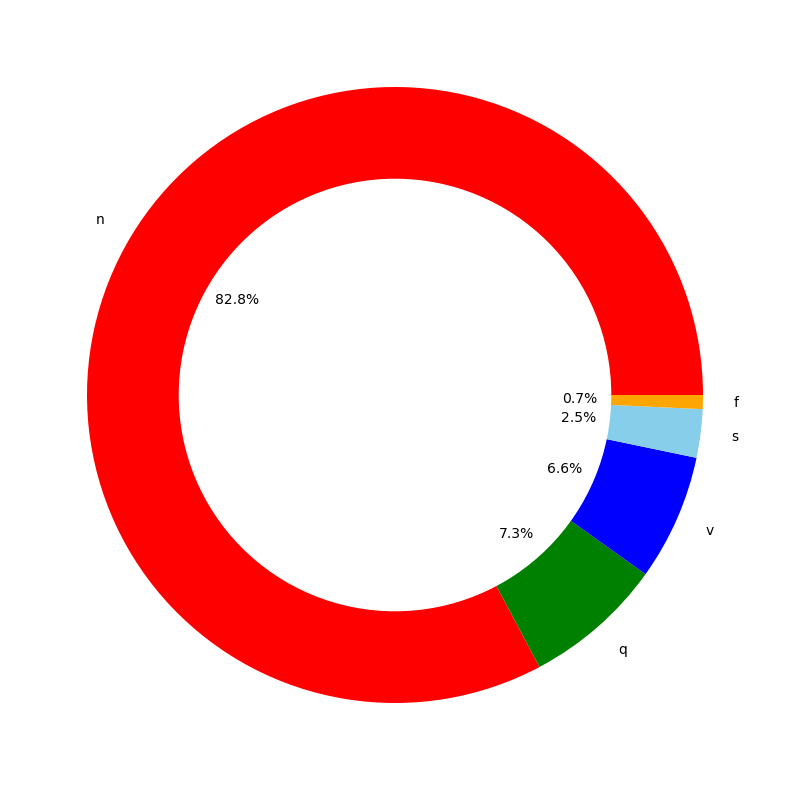

In [8]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibrium, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

We found significant differences in balance between the categories. Therefore, we employed a resampling technique to address this issue.

In [9]:
from sklearn.utils import resample
df_1 = df_train[df_train.iloc[:,187]==1]
df_2 = df_train[df_train.iloc[:,187]==2]
df_3 = df_train[df_train.iloc[:,187]==3]
df_4 = df_train[df_train.iloc[:,187]==4]
df_0 = (df_train[df_train.iloc[:,187]==0]).sample(n=20000,random_state=42)

df_1_upsample = resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample = resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample = resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample = resample(df_4,replace=True,n_samples=20000,random_state=126)

df_train=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [10]:
equilibrium = df_train.iloc[:,[187]].value_counts()
print(equilibrium)

187
0.0    20000
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: count, dtype: int64


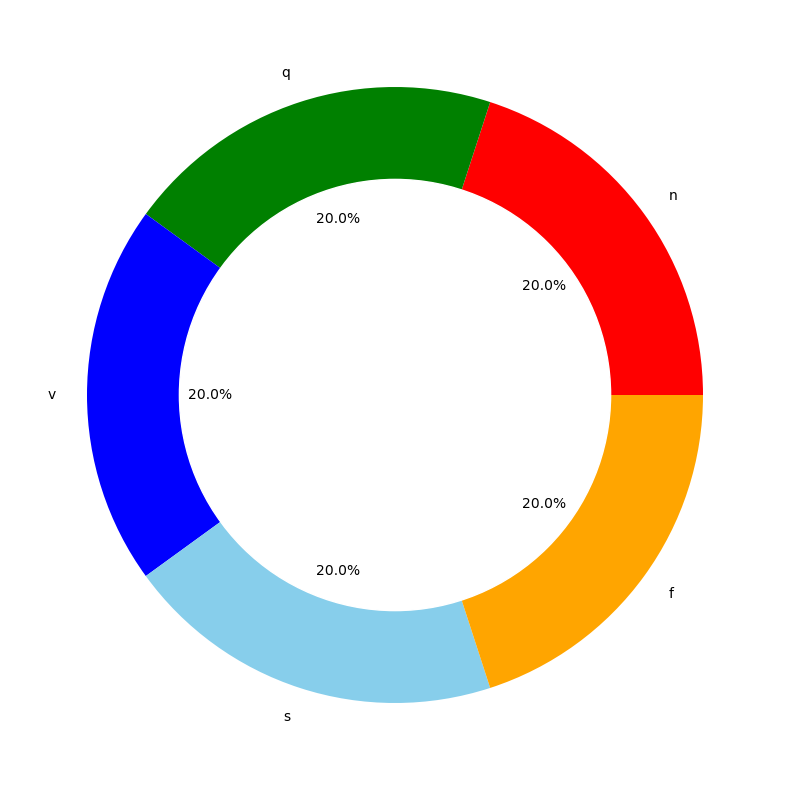

In [11]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibrium, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

## Classes
The pattern of each class

In [12]:
# Groupby "df_train" according to category (column 187), and draw one sample from each group.
c=df_train.groupby(df_train.iloc[:,187],group_keys=False).apply(lambda df_train : df_train.sample(1))

In [13]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
52090,0.098837,0.488372,0.697674,0.186047,0.133721,0.366279,0.569767,0.593023,0.627907,0.627907,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
73650,0.983651,0.757493,0.089918,0.158038,0.267030,0.247956,0.242507,0.242507,0.264305,0.269755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75945,0.767754,0.667946,0.500960,0.270633,0.111324,0.019194,0.000000,0.040307,0.051823,0.046065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
80639,1.000000,1.000000,0.604000,0.294000,0.152000,0.122000,0.104000,0.088000,0.074000,0.058000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
85269,0.822581,0.629032,0.580645,0.560484,0.536290,0.495968,0.463710,0.391129,0.338710,0.177419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


### <font color=orange>Class = 0, the normal beat

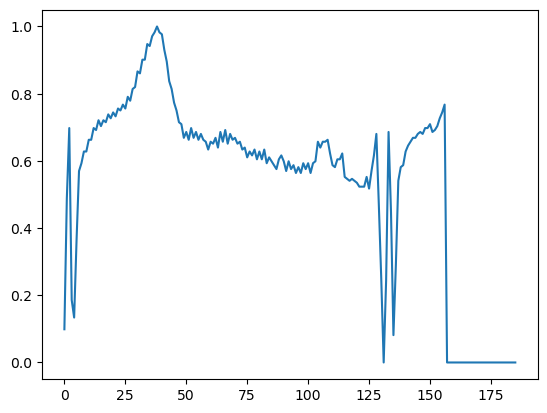

In [14]:
plt.plot(c.iloc[0,:186])

In [15]:
def plot_hist(class_number,size,min_,bins):
    img=df_train.loc[df_train[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(bins,bins),cmap=plt.cm.jet)
    plt.show()

1300000
1300000


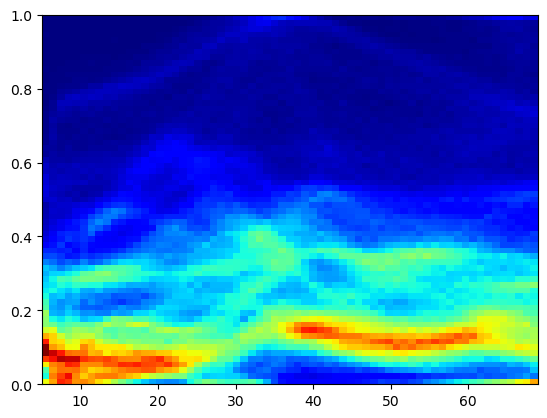

In [16]:
plot_hist(0,70,5,65)

### <font color=orange>Class = 1, the supraventricular premature beat

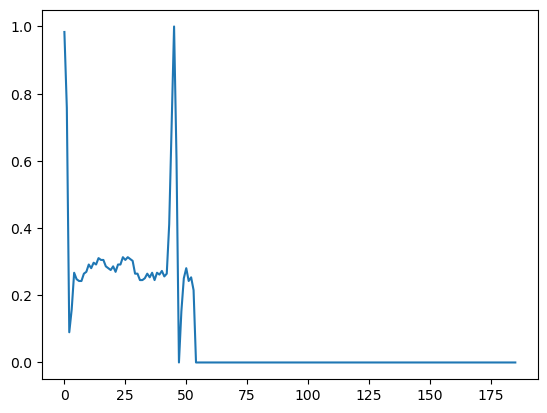

In [17]:
plt.plot(c.iloc[1,:186])

900000
900000


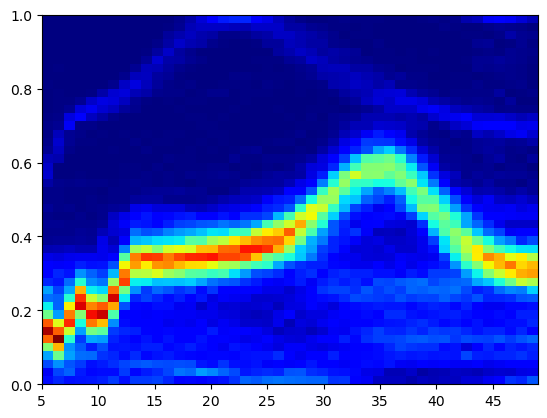

In [18]:
plot_hist(1,50,5,45)

### <font color=orange>Class = 2, the premature ventricular contraction

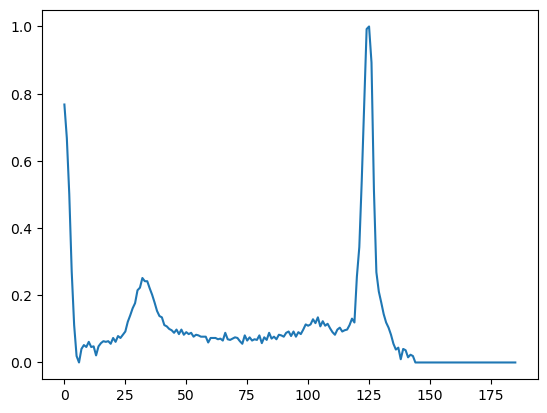

In [19]:
plt.plot(c.iloc[2,:186])

900000
900000


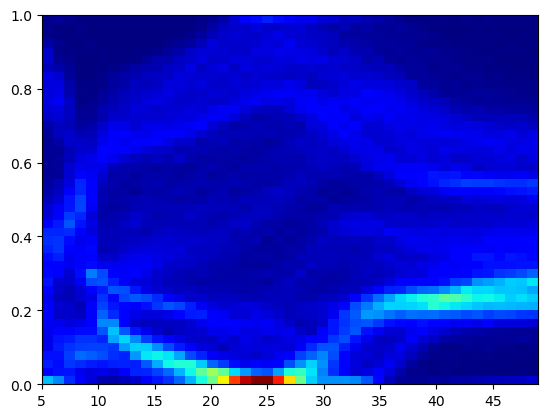

In [20]:
plot_hist(2,50,5,45)

### <font color=orange>Class = 3, the fusion of ventricular and normal beat

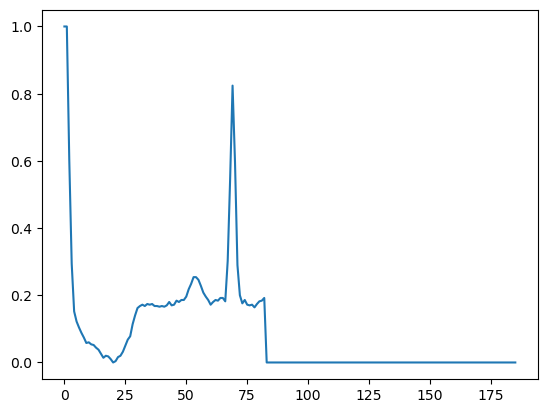

In [21]:
plt.plot(c.iloc[3,:186])

900000
900000


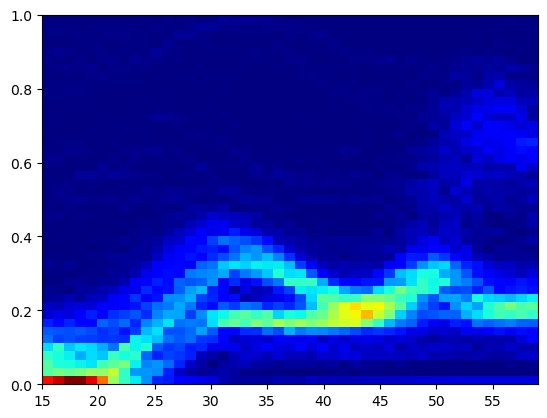

In [22]:
plot_hist(3,60,15,45)

### <font color=orange>Class = 4, the unclassifiable beat

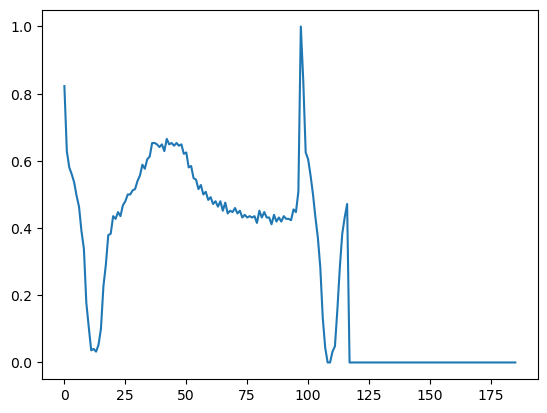

In [23]:
plt.plot(c.iloc[4,:186])

700000
700000


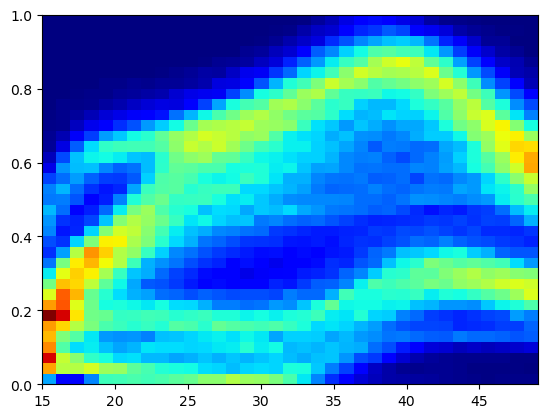

In [24]:
plot_hist(4,50,15,35)

## Model Building

### Data preprocessing

In [25]:
# A function that add a noise to the data to generalize your train.
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

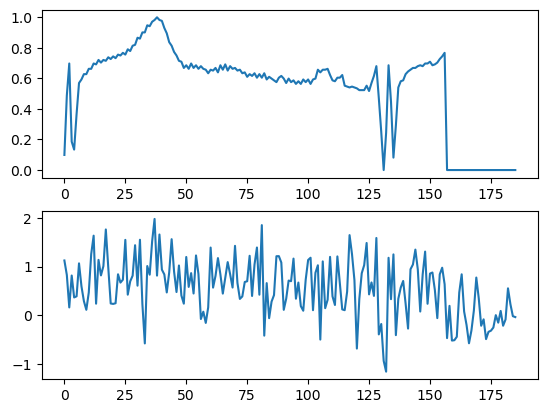

In [26]:
template=c.iloc[0,:186]
template_noise=add_gaussian_noise(template)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(template_noise)

plt.show()

Create X_train, X_test, y_train, y_test

In [27]:
target_train = df_train[187]
target_test = df_test[187]
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)

In [28]:
X_train = df_train.iloc[:,:186].values
X_test = df_test.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

### Create CNN model

In [33]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_ECG_CNN_model.keras', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_ECG_CNN_model.keras')
    return(model,history)

In [34]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [35]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6082 - loss: 1.0019 - val_accuracy: 0.6383 - val_loss: 1.0444
Epoch 2/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7003 - loss: 0.7882 - val_accuracy: 0.7158 - val_loss: 0.8813
Epoch 3/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7120 - loss: 0.7593 - val_accuracy: 0.6630 - val_loss: 0.9046
Epoch 4/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7243 - loss: 0.7247 - val_accuracy: 0.7648 - val_loss: 0.7518
Epoch 5/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7366 - loss: 0.6925 - val_accuracy: 0.6855 - val_loss: 0.8464
Epoch 6/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7456 - loss: 0.6702 - val_accuracy: 0.6844 - val_loss: 0.8197
Epoch 7/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7569 - loss: 0.6449 - val_accuracy: 0.7171 - val_loss: 0.7875
Epoch 8/40
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7706 - loss: 0

Accuracy: 75.91%


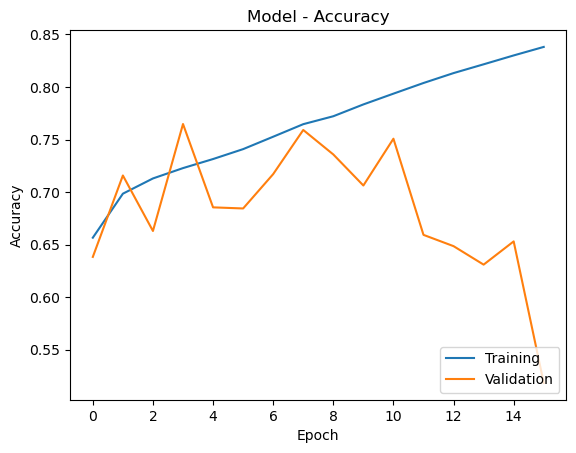

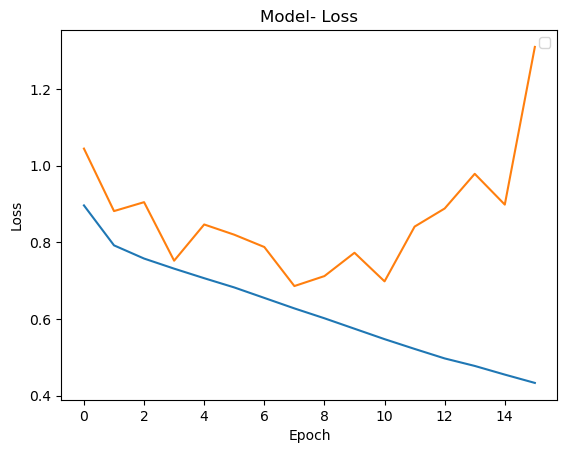

685/685 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [37]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

### Create confusion matrix with normalization

Normalized confusion matrix


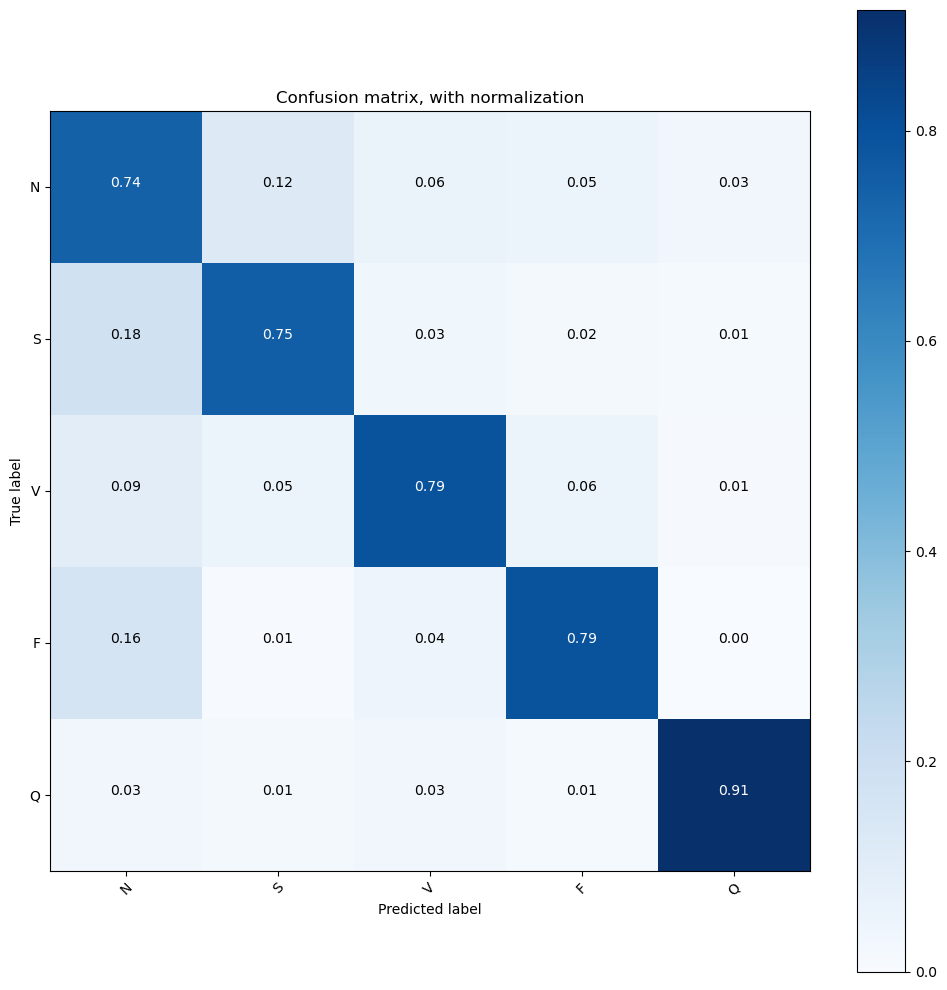

In [38]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()